# `TELECOM CHURN CASE STUDY`

`Problem Statement:`

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
For many incumbent operators, retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In [1]:
# Importing libraries for numerical analysis of data:
import pandas as pd
import numpy as np

# Importing libraries for data interpretation:
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for suppressing unnecessary warnings:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [2]:
# Reading our CSV file and storing it in a variable named - "df"
df = pd.read_csv("telecom_churn_data.csv")

In [3]:
# Checking the head of our datafile:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
# column wise summary for datatypes:
print(df.info(verbose=1))

# total summary for datatypes:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

**It is evident from above that we have `179 float64 type columns , 35 int64 type columns and 12 object type columns`.**

In [5]:
# Checking the shape of our datafile:

df.shape

(99999, 226)

**There are `99999 rows and 226 columns` in the data.**

In [6]:
# looking at the data statistics:

df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [7]:
# creating a backup for original data:

original = df.copy()

In [8]:
# creating column name list by the data types of columns:

id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

# Handling missing values

In [9]:
# First we will check the missing value ratio for each column:

df.isnull().sum()*100/len(df)

# we take sum of all null values and divide it by total number of entries and then multiply it by 100 to get percentage.

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

# Imputing Missing Values:

## 1.) Imputing with zeroes:

In [10]:
# Some recharge columns have a minimum value of 1 while some don't:

recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

df[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


**It can be observed that all the above recharge columns have a minimum value of either 0 , 1 or 0.5. We can replace all these with 0 since this means that the customer didn't recharge that month.**

In [11]:
# It is also observed that the recharge date and the recharge value are missing together which means the customer didn't recharge:

df.loc[df.total_rech_data_6.isnull() & df.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head()

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN


**Replacing with ZERO.**

In [12]:
# Creating a list of recharge columns for which we will impute missing values with zeroes:

zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [13]:
# Imputing missing values with 0:

df[zero_impute] = df[zero_impute].apply(lambda x: x.fillna(0))

In [14]:
# Making sure that values are imputed correctly:

df[zero_impute].isnull().sum()*100/df.shape[1]

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64

**All the misisng values are now replaced with 0 as is evident by the fact that there are no more null value in the above columns.**

In [15]:
# Drop id and date columns:

df = df.drop(id_cols + date_cols, axis=1)
print("Shape after dropping: ", df.shape)

Shape after dropping:  (99999, 212)


## 2.) Replacing NaN values in categorical variables:

In [16]:
# Replacing missing values with '-1' in categorical columns:

df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(-1))

In [17]:
# Missing value ratio:

df[cat_cols].isnull().sum()*100/df.shape[0]

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64

## 3.) Dropping variables with more than 70% missing values:

In [18]:
# We will simply drop any column which has a missing value percentage greater than 70% :
# But first let's get the name of all such columns :

initial_cols = df.shape[1]

include_cols = list(df.apply(lambda column: True if column.isnull().sum()/df.shape[0] < 0.7 else False))

drop_missing = pd.DataFrame({'features':df.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
5,arpu_8,True
6,arpu_9,True
7,onnet_mou_6,True
8,onnet_mou_7,True
9,onnet_mou_8,True


In [19]:
# Now we have the names of columns with missing values percentage greater than 70 so we may drop it now :

df = df.loc[:, include_cols]
dropped_cols = df.shape[1] - initial_cols
print("{0} columns dropped.".format(dropped_cols))

-16 columns dropped.


**We have dropped `16 columns`**.

In [20]:
# Once again we will check null percentages for all columns , arranged in ascending format:

print((df.isnull().sum() * 100 / len(df)).sort_values(ascending = False))

std_og_mou_9          7.745077
ic_others_9           7.745077
std_ic_mou_9          7.745077
spl_og_mou_9          7.745077
loc_og_t2m_mou_9      7.745077
spl_ic_mou_9          7.745077
isd_ic_mou_9          7.745077
loc_og_t2f_mou_9      7.745077
isd_og_mou_9          7.745077
roam_og_mou_9         7.745077
loc_og_t2c_mou_9      7.745077
og_others_9           7.745077
loc_og_mou_9          7.745077
std_og_t2c_mou_9      7.745077
std_og_t2f_mou_9      7.745077
std_og_t2t_mou_9      7.745077
std_ic_t2o_mou_9      7.745077
loc_og_t2t_mou_9      7.745077
std_og_t2m_mou_9      7.745077
std_ic_t2t_mou_9      7.745077
loc_ic_t2f_mou_9      7.745077
std_ic_t2f_mou_9      7.745077
loc_ic_mou_9          7.745077
offnet_mou_9          7.745077
loc_ic_t2m_mou_9      7.745077
std_ic_t2m_mou_9      7.745077
loc_ic_t2t_mou_9      7.745077
roam_ic_mou_9         7.745077
onnet_mou_9           7.745077
std_og_t2c_mou_8      5.378054
loc_ic_t2m_mou_8      5.378054
isd_og_mou_8          5.378054
std_og_m

# 4.) Imputation using mode:

In [21]:
# Mode imputation for all the remaining columns ( categorical and numerical ):

missing_cols = df.columns[df.isnull().sum()>0]
for col in missing_cols:
    df[col].fillna((df[col].mode()[0]), inplace=True)

In [22]:
# A final check for null value percentages:

print((df.isnull().sum() * 100 / len(df)).sort_values(ascending = False))

sep_vbc_3g            0.0
og_others_7           0.0
spl_og_mou_9          0.0
spl_og_mou_8          0.0
spl_og_mou_7          0.0
spl_og_mou_6          0.0
isd_og_mou_9          0.0
isd_og_mou_8          0.0
isd_og_mou_7          0.0
isd_og_mou_6          0.0
std_og_mou_9          0.0
std_og_mou_8          0.0
std_og_mou_7          0.0
std_og_mou_6          0.0
std_og_t2c_mou_9      0.0
std_og_t2c_mou_8      0.0
std_og_t2c_mou_7      0.0
std_og_t2c_mou_6      0.0
std_og_t2f_mou_9      0.0
std_og_t2f_mou_8      0.0
std_og_t2f_mou_7      0.0
std_og_t2f_mou_6      0.0
std_og_t2m_mou_9      0.0
og_others_6           0.0
og_others_8           0.0
jun_vbc_3g            0.0
og_others_9           0.0
std_ic_t2t_mou_6      0.0
loc_ic_mou_9          0.0
loc_ic_mou_8          0.0
loc_ic_mou_7          0.0
loc_ic_mou_6          0.0
loc_ic_t2f_mou_9      0.0
loc_ic_t2f_mou_8      0.0
loc_ic_t2f_mou_7      0.0
loc_ic_t2f_mou_6      0.0
loc_ic_t2m_mou_9      0.0
loc_ic_t2m_mou_8      0.0
loc_ic_t2m_m

**Now we have successfully imputed with mode, removed greater than 70% missing and replaced missing values and are left with no missing values. We can now continue with our analysis.**

# `Filtering high-value customers:`

**Customers that contribute to most of our sales by consuming majority of our products or by making huge purchases are the high value customers to us. We need to filter such customers and treat them specifically .**

In [23]:
# Calculating the total data recharge amount for June and July by: number of recharges * average recharge amount

df['total_data_rech_6'] = df.total_rech_data_6 * df.av_rech_amt_data_6
df['total_data_rech_7'] = df.total_rech_data_7 * df.av_rech_amt_data_7  

In [24]:
# Calculating total recharge amount for June and July by: call recharge amount + data recharge amount

df['amt_data_6'] = df.total_rech_amt_6 + df.total_data_rech_6
df['amt_data_7'] = df.total_rech_amt_7 + df.total_data_rech_7

In [25]:
# Calculating average recharge done by customers in June and July:

df['av_amt_data_6_7'] = (df.amt_data_6 + df.amt_data_7)/2

In [26]:
# look at the 70th percentile recharge amount:

print("Recharge amount at 70th percentile is {0}".format(df.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile is 478.0


In [27]:
# Retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount:

df_filtered = df.loc[df.av_amt_data_6_7 >= df.av_amt_data_6_7.quantile(0.7), :]
df_filtered = df_filtered.reset_index(drop=True)
df_filtered.shape

(30001, 201)

**Here `30,001 is the number of customers who are high valued` , meaning that they recharge their mobiles with 70th percentile or greater than that amount.**

In [28]:
# Deleting variables created to filter high-value customers as we don't need them anymore:

df_filtered = df_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
df_filtered.shape

(30001, 196)

**We're left with `30,001 rows and 196 columns` after selecting the customers who have provided recharge value of more than or equal to the recharge value of the 70th percentile customer.**

# Creating churn:

In [29]:
# Calculating total incoming and outgoing minutes of usage:

df_filtered['total_calls_mou_9'] = df_filtered.total_ic_mou_9 + df_filtered.total_og_mou_9

In [30]:
# Calculate 2g and 3g data consumption:

df_filtered['total_internet_mb_9'] =  df_filtered.vol_2g_mb_9 + df_filtered.vol_3g_mb_9

In [31]:
# Creating churn variable: those who have not used either calls or internet in the month of September are customers who have churned:
# We'll represent not churn with 0 and churn with 1:

df_filtered['churn'] = df_filtered.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [32]:
# We may delete derived variables now as we don't need them further:

df_filtered = df_filtered.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [33]:
# Changing data type to category for easy analysis:

df_filtered.churn = df_filtered.churn.astype("category")

print("Churn Ratio is:",df_filtered.churn.value_counts()*100/df_filtered.shape[0])

Churn Ratio is: 0    91.863605
1     8.136395
Name: churn, dtype: float64


**Class Imbalance exists as we have 91% values for churn rate 0 and only 8 % values for churn rate 1.**

# Calculating difference between 8th and previous months ( June and July ):

**We will derive some variables. The most important feature, in this situation, can be the difference between the 8th month and the previous months. The difference can be in patterns such as usage difference or recharge value difference. Let's calculate difference variable as the difference between 8th month and the average of 6th and 7th month.**

In [34]:
df_filtered['arpu_diff'] = df_filtered.arpu_8 - ((df_filtered.arpu_6 + df_filtered.arpu_7)/2)
df_filtered['onnet_mou_diff'] = df_filtered.onnet_mou_8 - ((df_filtered.onnet_mou_6 + df_filtered.onnet_mou_7)/2)
df_filtered['offnet_mou_diff'] = df_filtered.offnet_mou_8 - ((df_filtered.offnet_mou_6 + df_filtered.offnet_mou_7)/2)
df_filtered['roam_ic_mou_diff'] = df_filtered.roam_ic_mou_8 - ((df_filtered.roam_ic_mou_6 + df_filtered.roam_ic_mou_7)/2)
df_filtered['roam_og_mou_diff'] = df_filtered.roam_og_mou_8 - ((df_filtered.roam_og_mou_6 + df_filtered.roam_og_mou_7)/2)
df_filtered['loc_og_mou_diff'] = df_filtered.loc_og_mou_8 - ((df_filtered.loc_og_mou_6 + df_filtered.loc_og_mou_7)/2)
df_filtered['std_og_mou_diff'] = df_filtered.std_og_mou_8 - ((df_filtered.std_og_mou_6 + df_filtered.std_og_mou_7)/2)
df_filtered['isd_og_mou_diff'] = df_filtered.isd_og_mou_8 - ((df_filtered.isd_og_mou_6 + df_filtered.isd_og_mou_7)/2)
df_filtered['spl_og_mou_diff'] = df_filtered.spl_og_mou_8 - ((df_filtered.spl_og_mou_6 + df_filtered.spl_og_mou_7)/2)
df_filtered['total_og_mou_diff'] = df_filtered.total_og_mou_8 - ((df_filtered.total_og_mou_6 + df_filtered.total_og_mou_7)/2)
df_filtered['loc_ic_mou_diff'] = df_filtered.loc_ic_mou_8 - ((df_filtered.loc_ic_mou_6 + df_filtered.loc_ic_mou_7)/2)
df_filtered['std_ic_mou_diff'] = df_filtered.std_ic_mou_8 - ((df_filtered.std_ic_mou_6 + df_filtered.std_ic_mou_7)/2)
df_filtered['isd_ic_mou_diff'] = df_filtered.isd_ic_mou_8 - ((df_filtered.isd_ic_mou_6 + df_filtered.isd_ic_mou_7)/2)
df_filtered['spl_ic_mou_diff'] =df_filtered.spl_ic_mou_8 - ((df_filtered.spl_ic_mou_6 + df_filtered.spl_ic_mou_7)/2)
df_filtered['total_ic_mou_diff'] = df_filtered.total_ic_mou_8 - ((df_filtered.total_ic_mou_6 + df_filtered.total_ic_mou_7)/2)
df_filtered['total_rech_num_diff'] = df_filtered.total_rech_num_8 - ((df_filtered.total_rech_num_6 + df_filtered.total_rech_num_7)/2)
df_filtered['total_rech_amt_diff'] = df_filtered.total_rech_amt_8 - ((df_filtered.total_rech_amt_6 + df_filtered.total_rech_amt_7)/2)
df_filtered['max_rech_amt_diff'] = df_filtered.max_rech_amt_8 - ((df_filtered.max_rech_amt_6 + df_filtered.max_rech_amt_7)/2)
df_filtered['total_rech_data_diff'] = df_filtered.total_rech_data_8 - ((df_filtered.total_rech_data_6 + df_filtered.total_rech_data_7)/2)
df_filtered['max_rech_data_diff'] = df_filtered.max_rech_data_8 - ((df_filtered.max_rech_data_6 + df_filtered.max_rech_data_7)/2)
df_filtered['av_rech_amt_data_diff'] = df_filtered.av_rech_amt_data_8 - ((df_filtered.av_rech_amt_data_6 + df_filtered.av_rech_amt_data_7)/2)
df_filtered['vol_2g_mb_diff'] = df_filtered.vol_2g_mb_8 - ((df_filtered.vol_2g_mb_6 + df_filtered.vol_2g_mb_7)/2)
df_filtered['vol_3g_mb_diff'] = df_filtered.vol_3g_mb_8 - ((df_filtered.vol_3g_mb_6 + df_filtered.vol_3g_mb_7)/2)

In [35]:
# let's look at summary of "total_og_mou_diff"

df_filtered['total_og_mou_diff'].describe()

count    30001.000000
mean       -67.437337
std        502.630069
min      -7213.410000
25%       -168.025000
50%        -14.625000
75%         67.915000
max      12768.705000
Name: total_og_mou_diff, dtype: float64

## Deleting columns that belong to the churn month (9th month):

In [36]:
# Deleting all variables relating to 9th month:

df_filtered = df_filtered.filter(regex='[^9]$', axis=1)
df_filtered.shape

(30001, 173)

In [37]:
# Extracting all names that end with 9:

col_9_names = df.filter(regex='9$', axis=1).columns

# Updating num_cols and cat_cols column name list:

cat_cols = [col for col in cat_cols if col not in col_9_names]
cat_cols.append('churn')
num_cols = [col for col in df_filtered.columns if col not in cat_cols]

## Visualising data:

In [38]:
# Change columns types for data visualising :

df_filtered[num_cols] = df_filtered[num_cols].apply(pd.to_numeric)
df_filtered[cat_cols] = df_filtered[cat_cols].apply(lambda column: column.astype("category"), axis=0)

In [39]:
# Creating plotting functions:

def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    

## Univariate EDA

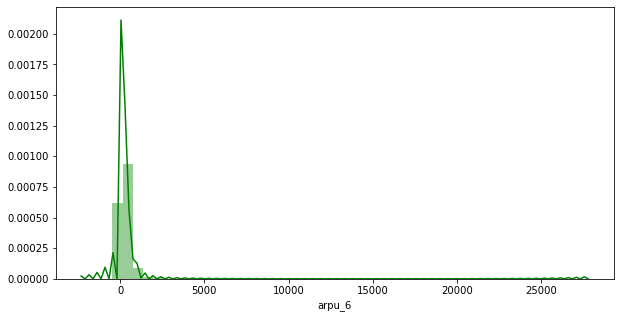

In [40]:
# Checking average revenue per customer for month 6 ( june ) : arpu_6

plt.figure(figsize=(10,5))
sns.distplot(df.arpu_6,color='g')

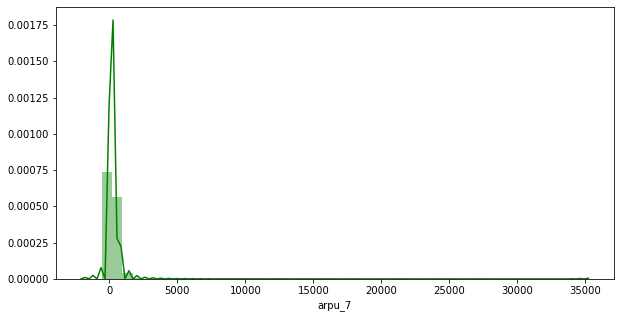

In [41]:
# Average revenue per customer for month 7 ( july ) : arpu_7

plt.figure(figsize=(10,5))
sns.distplot(df.arpu_7,color='g')

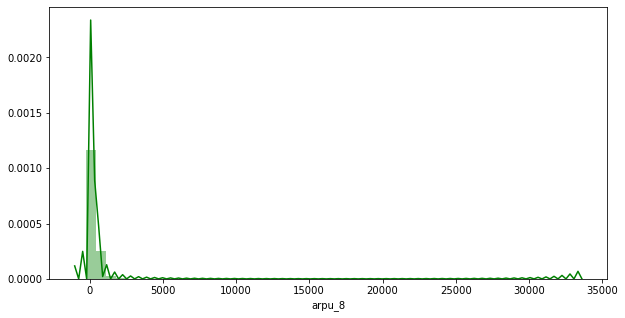

In [42]:
# Average revenue per customer for month 8 ( august ) : arpu_8

plt.figure(figsize=(10,5))
sns.distplot(df.arpu_8,color='g')

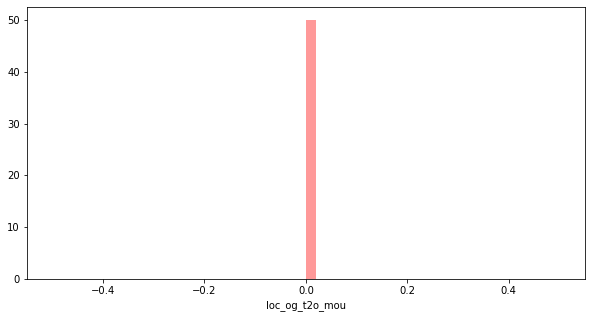

In [43]:
# local outgoing calls :

plt.figure(figsize=(10,5))
sns.distplot(df.loc_og_t2o_mou,color='r')

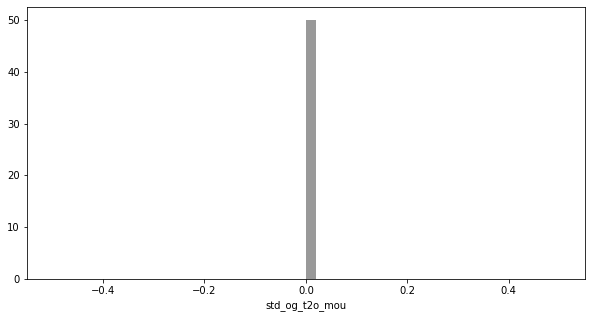

In [44]:
# STD outgoing calls:

plt.figure(figsize=(10,5))
sns.distplot(df.std_og_t2o_mou,color='black')

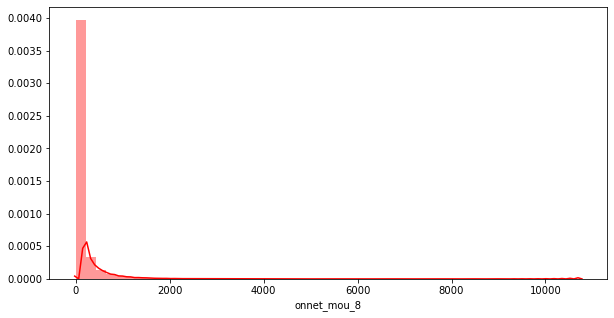

In [45]:
# All kind of calls inside the operator T network :

plt.figure(figsize=(10,5))
sns.distplot(df.onnet_mou_8,color='red')

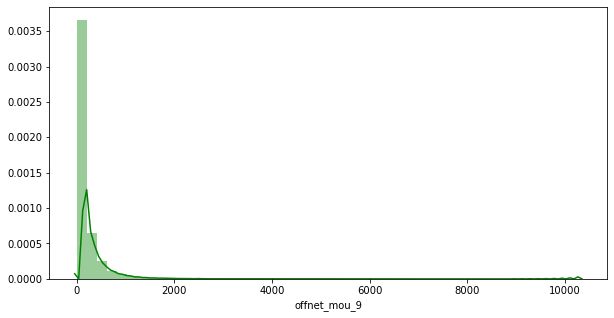

In [46]:
# All kind of calls outside the operator T network:

plt.figure(figsize=(10,5))
sns.distplot(df.offnet_mou_9,color='g')

**Variables are very `skewed towards the left`.**

## Bivariate EDA

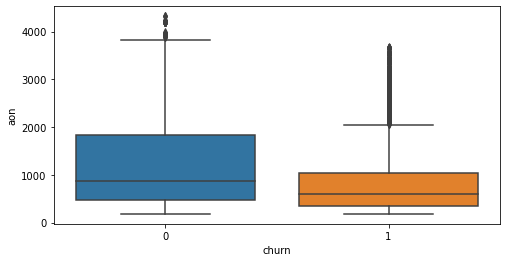

In [47]:
# Number of days the customer is using the network ( aon ) for churn rates 0 and 1:

plt.figure(figsize=(8,4))
sns.boxplot(x=df_filtered.churn,y=df_filtered.aon)

**Customers who churned were those who have used network services for lesser time period.**

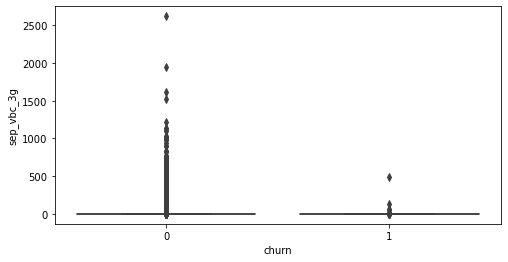

In [48]:
# Boxplot for volume based cost for september 3g:

plt.figure(figsize=(8,4))
sns.boxplot(x=df_filtered.churn,y=df_filtered.sep_vbc_3g)

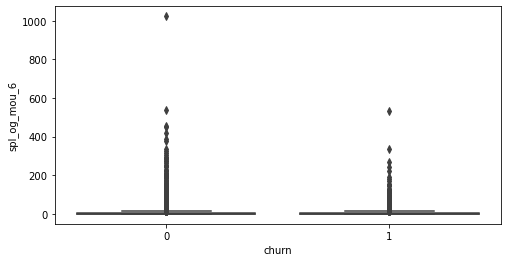

In [49]:
# Boxplot for special outgoing calls in month 6:

plt.figure(figsize=(8,4))
sns.boxplot(x=df_filtered.churn,y=df_filtered.spl_og_mou_6)

**Not much can be inferred here.**

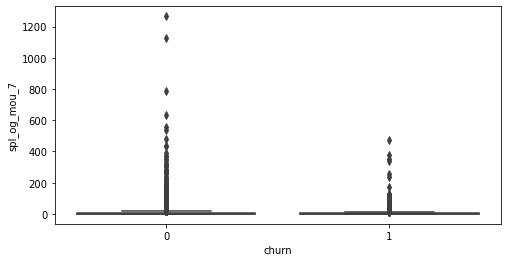

In [50]:
# Boxplot for special outgoing calls in month 7:

plt.figure(figsize=(8,4))
sns.boxplot(x=df_filtered.churn,y=df_filtered.spl_og_mou_7)

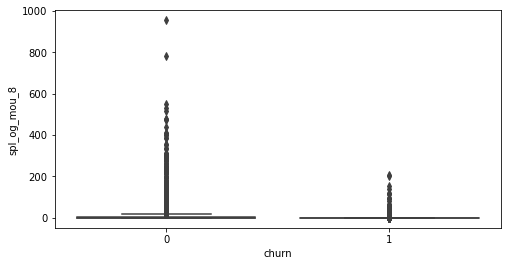

In [51]:
# Boxplot for special outgoing calls in month 8:

plt.figure(figsize=(8,4))
sns.boxplot(x=df_filtered.churn,y=df_filtered.spl_og_mou_8)

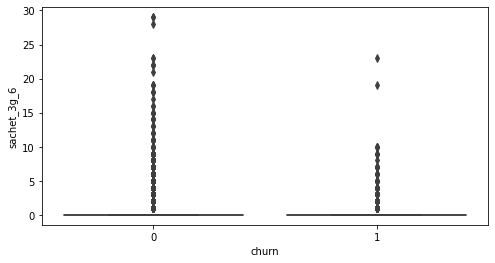

In [52]:
# Boxplot for sevrice schemes for less than a month for 3g and month 6:

plt.figure(figsize=(8,4))
sns.boxplot(x=df_filtered.churn,y=df_filtered.sachet_3g_6)

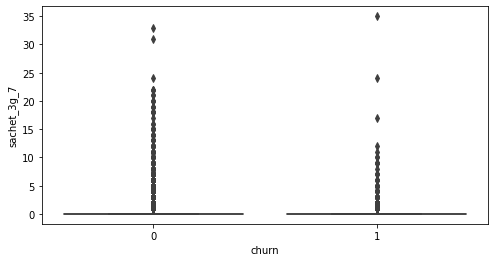

In [53]:
# Boxplot for sevrice schemes for less than a month for 3g and month 7:

plt.figure(figsize=(8,4))
sns.boxplot(x=df_filtered.churn,y=df_filtered.sachet_3g_7)

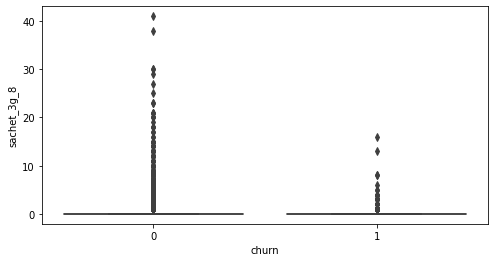

In [54]:
# Boxplot for sevrice schemes for less than a month for 3g and month 8:

plt.figure(figsize=(8,4))
sns.boxplot(x=df_filtered.churn,y=df_filtered.sachet_3g_8)

**`Conclusion :`**
**Most of the boxplots do not infer much however there seems to be some outliers for `sachet_3g_8 ,spl_og_mou_8 ,sep_vbc_3g` .**

# Capping these outliers using K-sigma technique:

In [55]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [56]:
# Cap outliers in the numeric columns:

df_filtered[num_cols] = df_filtered[num_cols].apply(cap_outliers, axis=0)

# `Modelling`

## Making predictions

In [57]:
# Importing required libraries:

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

## Preprocessing data

In [58]:
# Change churn to numeric:

df_filtered['churn'] = pd.to_numeric(df_filtered['churn'])

### Train Test split

In [59]:
# Divide data into train and test:

X = df_filtered.drop("churn", axis = 1)
y = df_filtered.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, random_state = 100)

In [60]:
# Printing the shapes of train and test sets:

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21000, 172)
(21000,)
(9001, 172)
(9001,)


## Aggregating the categorical columns

In [61]:
train = pd.concat([X_train, y_train], axis=1)

# Aggregate the categorical variables:

print(train.groupby('night_pck_user_6').churn.mean())
print(train.groupby('night_pck_user_7').churn.mean())
print(train.groupby('night_pck_user_8').churn.mean())
print(train.groupby('fb_user_6').churn.mean())
print(train.groupby('fb_user_7').churn.mean())
print(train.groupby('fb_user_8').churn.mean())

night_pck_user_6
-1.0    0.097337
 0.0    0.066789
 1.0    0.088136
Name: churn, dtype: float64
night_pck_user_7
-1.0    0.113402
 0.0    0.055655
 1.0    0.060284
Name: churn, dtype: float64
night_pck_user_8
-1.0    0.140112
 0.0    0.028431
 1.0    0.033195
Name: churn, dtype: float64
fb_user_6
-1.0    0.097337
 0.0    0.080702
 1.0    0.066276
Name: churn, dtype: float64
fb_user_7
-1.0    0.113402
 0.0    0.064103
 1.0    0.055058
Name: churn, dtype: float64
fb_user_8
-1.0    0.140112
 0.0    0.062943
 1.0    0.024685
Name: churn, dtype: float64


In [62]:
# Replace categories with aggregated values in each categorical column:

mapping = {'night_pck_user_6' : {-1: 0.097337, 0: 0.066789, 1: 0.088136},
           'night_pck_user_7' : {-1: 0.113402, 0: 0.055655, 1: 0.060284},
           'night_pck_user_8' : {-1: 0.140112, 0: 0.028431, 1: 0.033195},
           'fb_user_6'        : {-1: 0.097337, 0: 0.080702, 1: 0.066276},
           'fb_user_7'        : {-1: 0.113402, 0: 0.064103, 1: 0.055058},
           'fb_user_8'        : {-1: 0.140112, 0: 0.062943, 1: 0.024685}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

In [63]:
# Checking data type of categorical columns to make sure they are numeric:

X_train[[col for col in cat_cols if col not in ['churn']]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 11785 to 5640
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   night_pck_user_6  21000 non-null  float64
 1   night_pck_user_7  21000 non-null  float64
 2   night_pck_user_8  21000 non-null  float64
 3   fb_user_6         21000 non-null  float64
 4   fb_user_7         21000 non-null  float64
 5   fb_user_8         21000 non-null  float64
dtypes: float64(6)
memory usage: 1.1 MB


## PCA

In [64]:
# Applying pca to train data:

pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

pca.fit(X_train)
df_pca = pca.fit_transform(X_train)

In [65]:
# Extracting pca model from pipeline:
pca = pca.named_steps['pca']

# let's have a look at explainded variance of PCA components:
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       11.53
1       20.95
2       26.78
3       31.67
4       35.76
5       39.45
6       42.19
7       44.76
8       47.08
9       49.25
10      51.29
11      53.22
12      54.99
13      56.71
14      58.31
15      59.77
16      61.14
17      62.46
18      63.79
19      65.08
20      66.30
21      67.47
22      68.59
23      69.68
24      70.70
25      71.67
26      72.63
27      73.53
28      74.42
29      75.29
30      76.14
31      76.95
32      77.75
33      78.54
34      79.30
35      80.05
36      80.78
37      81.47
38      82.12
39      82.76
40      83.38
41      83.94
42      84.49
43      85.03
44      85.56
45      86.07
46      86.56
47      87.04
48      87.50
49      87.95
50      88.37
51      88.77
52      89.15
53      89.51
54      89.87
55      90.22
56      90.56
57      90.89
58      91.21
59      91.54
60      91.84
61      92.14
62      92.43
63      92.71
64      92.98
65      93.25
66      93.51
67      93.77
68      94.01
69      94.24
70      94.47
71    

**`~ 60 components explain 90% variance`**

**`~ 80 components explain 95% variance`**

Text(0.5, 1.0, 'Cumulative Variance')

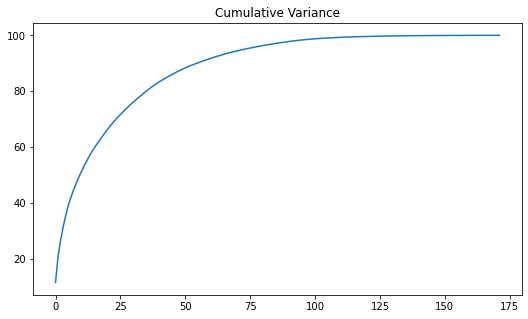

In [66]:
# Plotting feature variance:

features = range(pca.n_components_)
graph = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) 
plt.plot(graph)
plt.title("Cumulative Variance")

# 1. Logistic Regression

In [67]:
# Creating pipeline:

PCA_VARS = 60
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [68]:
# Model fitting:

pipeline.fit(X_train, y_train)

# Checking score on train data:

pipeline.score(X_train, y_train)

0.8156190476190476

### Evaluating on Test Data:

In [69]:
# Predict churn on test data:
y_pred = pipeline.predict(X_test)

# Creating confusion matrix:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[6819 1432]
 [ 127  623]]


In [70]:
# Check sensitivity and specificity:

sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# Checking area under curve:

y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

Sensitivity: 	0.83
Specificity: 	0.83
AUC:    	 0.9


### Hyperparameter tuning - PCA and Logistic Regression

In [71]:
# Class imbalance

y_train.value_counts()/y_train.shape

0    0.919476
1    0.080524
Name: churn, dtype: float64

In [72]:
# PCA
pca = PCA()

# We will handle the class imbalance by using the class weight - it adjusts the cost function:
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# Creating pipeline:
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

pca_logistic = Pipeline(steps)

# Hyperparameter space:
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# Creating 5 folds:
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# Creating gridsearch object:
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [73]:
# Fitting model:

model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [74]:
# Cross validation results:

pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.749003,0.559562,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
1,4.023387,0.904262,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,21
2,3.650810,0.947094,0.122320,0.029074,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.905014,0.872235,0.894825,0.877615,0.918840,0.893706,0.017209,10
3,4.387798,0.706540,0.106787,0.014669,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.906292,0.874230,0.900196,0.887330,0.917479,0.897105,0.015019,1
4,2.616010,0.398980,0.000000,0.000000,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
5,3.451782,0.341341,0.000000,0.000000,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
6,3.657664,0.577082,0.107364,0.024550,0.5,l2,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.904337,0.873121,0.895896,0.878018,0.918044,0.893883,0.016612,9
7,4.485181,1.124119,0.099269,0.019731,0.5,l2,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.906291,0.874222,0.900252,0.885886,0.917188,0.896768,0.015143,2
8,2.942917,0.704363,0.000000,0.000000,1,l1,60,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
9,3.538426,0.838973,0.000000,0.000000,1,l1,80,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,29


In [75]:
# Print best hyperparameters:

print("Best AUC is ", model.best_score_)
print("Best hyperparameters is ", model.best_params_)

Best AUC is  0.8971052680605665
Best hyperparameters is  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [76]:
# Predicting churn on test data:
y_pred = model.predict(X_test)

# creating confusion matrix:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[7110 1141]
 [ 136  614]]


In [77]:
# Sensitivity and Specificity:
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# Checking area under curve:
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

Sensitivity: 	0.82
Specificity: 	0.86
AUC:    	 0.9


**On test set for logistic regression we get `Sensitivity: 0.82 , Specificity: 0.86 and AUC:  0.9.` This means it is otherwise a good model.**

In [78]:
# Accuracy for logistic regression model:

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8581268747916898

# 2. Random Forest

In [79]:
# Again we will use class weight to handle class imbalance - it adjusts the cost function:
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# Hyperparameter space:
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# Creating 5 folds:
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# Creating gridsearch object:
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1)

In [80]:
# Model Fitting:
model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc')

In [81]:
# Printing the best hyperparameters:

print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9273850410570927
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [82]:
# Predicting churn on test data:
y_pred = model.predict(X_test)

# Creating confusion matrix:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8137  114]
 [ 385  365]]


In [83]:
# Sensitivity and Specificity:
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# Check area under curve:
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

Sensitivity: 	0.49
Specificity: 	0.99
AUC:    	 0.93


##  Choosing best features

In [84]:
# Running a random forest model on train data:

max_features = int(round(np.sqrt(X_train.shape[1])))   
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4)

13


In [85]:
# Fitting model:

rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=13,
                       oob_score=True, random_state=4)

In [86]:
# Out of Bag Score to check error in Random Forest Model:

rf_model.oob_score_

0.9431428571428572

**Our `OOB Score is 94%` . Which is a good score meaning that the `model is accurate.`**

In [87]:
# Predicting churn on test data:
y_pred = rf_model.predict(X_test)

# Creating confusion matrix:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8154   97]
 [ 404  346]]


In [88]:
# Sensitivity and Specificity:
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# Checking area under curve:
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

Sensitivity: 	0.46
Specificity: 	0.99
ROC:    	 0.93


In [89]:
# Accuracy for Random Forests :
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9443395178313521

**Random forest seems to be best model untill now . It has highest accuracy and specificity and lesser sensitivity.**

# 3. Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
dt = DecisionTreeClassifier(max_depth=14)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=14)

In [92]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [93]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [94]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.9895714285714285


array([[19264,    45],
       [  174,  1517]], dtype=int64)

In [95]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.9190089990001111


array([[7922,  329],
       [ 400,  350]], dtype=int64)

In [96]:
dt = DecisionTreeClassifier(random_state=42)

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [99]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [100]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [101]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, random_state=42)

In [102]:
dt_best = grid_search.best_estimator_

In [103]:
from sklearn.metrics import classification_report

In [104]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8251
           1       0.73      0.51      0.60       750

    accuracy                           0.94      9001
   macro avg       0.84      0.74      0.78      9001
weighted avg       0.94      0.94      0.94      9001



**We get really high values for precision and recall for not churn but less value for churn. This doesnt seem to be a good model.**

### Feature Importance

In [105]:
# Predictors:
features = df_filtered.drop('churn', axis=1).columns

# feature_importance:
importance = rf_model.feature_importances_

# Creating dataframe:
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# Sorting features:
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


,variables,importance_percentage
0,total_ic_mou_8,5.032898
1,loc_ic_mou_8,4.975890
2,loc_ic_t2m_mou_8,4.625220
3,total_og_mou_8,3.265820
4,last_day_rch_amt_8,2.684572
5,loc_og_mou_8,2.568715
6,arpu_8,2.541804
7,loc_og_t2t_mou_8,2.221312
8,total_rech_amt_diff,2.198270
9,loc_ic_t2t_mou_8,2.165843


### Extracting top 30 features

In [106]:
# Extracting top 30 features:

top_features = feature_importance.variables[0:30]

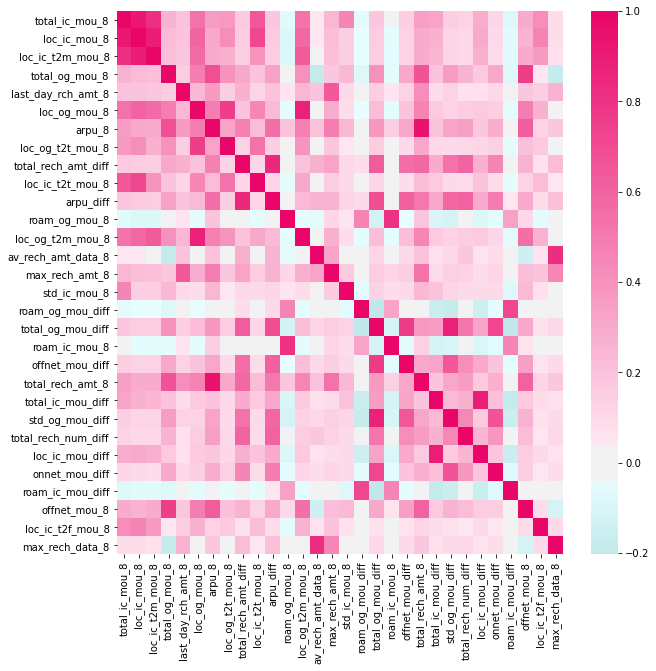

In [107]:
# Plotting heatmap:

plt.rcParams["figure.figsize"] =(10,10)
heatmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap=heatmap)

In [108]:
top_features = ['total_ic_mou_8', 'total_rech_amt_diff', 'total_og_mou_8', 'arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 
                'std_ic_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8']
X_train = X_train[top_features]
X_test = X_test[top_features]

In [109]:
# logistic Regression:
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# Compiling pipeline:
logistic = Pipeline(steps)

# Hyperparameter space:
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# Creating 5 folds:
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# Creating gridsearch object:
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1)

In [110]:
# Model Fitting:

model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [111]:
# Printing best hyperparameters:

print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8727042373300028
Best hyperparameters:  {'logistic__C': 5, 'logistic__penalty': 'l2'}


In [112]:
# Predicting churn on test data:
y_pred = model.predict(X_test)

# Creating confusion matrix:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[6923 1328]
 [ 148  602]]


In [113]:
# Sensitivity and Specificity:
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# Checking area under curve:
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

Sensitivity: 	0.8
Specificity: 	0.84
ROC:    	 0.88


### Extracting the intercept and the coefficients from the logistic model:

In [114]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [115]:
# Intercept:
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [116]:
# Coefficients:
coefficients = logistic_model.coef_.reshape((9, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [117]:
# Concatenate dataframes:
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,total_ic_mou_8,total_rech_amt_diff,total_og_mou_8,arpu_8,roam_ic_mou_8,roam_og_mou_8,std_ic_mou_8,av_rech_amt_data_8,std_og_mou_8
0,-1.543839,-1.083237,-0.681509,-1.688414,0.145849,0.005684,0.19406,0.131227,-0.785492,1.103507


**`Observations :`**

- **From random forest algorithm, Local Incoming for Month 8, Average Revenue Per Customer for Month 8 and Max Recharge Amount     for Month 8 are the most important predictor variables to predict churn.**
- **The results from random forest are very similar to that of the logistic regression and in line to what we had expected from     our EDA.**

**`Overall Business Insights :`**

1. Very Less Amount of High Value customers are churning which implies good service and more happy customers overall.

2. Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using    services from a roaming zone.

3. The company needs to focus on the STD and ISD rates. Possibility is that the rates are too high because of high churn from      this area . We can provide customers with STD , ISD packages , discounts .

4. Local Incoming and Outgoing Calls for 8th Month and Average Revenue in 8th Month are strong indicators of Churn Behaviour.      Maximum recharge amount is also a good indicator of churn. Company can come up with discounts for local incoming and            outgoing calls for future prevention of churn.

# Random Forest is the best method to Predict Churn, other models are fair.